In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cus_behav = pd.read_excel("CustomerBehaviorData.xlsx")
cus_dem = pd.read_excel("CustomerDemographics.xlsx")
credit_cons = pd.read_excel("CreditConsumptionData.xlsx")

In [3]:
df = pd.merge(credit_cons, cus_behav, on = 'ID')
df = pd.merge(df, cus_dem, on = "ID")

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            20000 non-null  int64  
 1   cc_cons                       15000 non-null  float64
 2   cc_cons_apr                   20000 non-null  float64
 3   dc_cons_apr                   20000 non-null  float64
 4   cc_cons_may                   19999 non-null  float64
 5   dc_cons_may                   20000 non-null  float64
 6   cc_cons_jun                   20000 non-null  float64
 7   dc_cons_jun                   19999 non-null  float64
 8   cc_count_apr                  19999 non-null  float64
 9   cc_count_may                  20000 non-null  int64  
 10  cc_count_jun                  20000 non-null  int64  
 11  dc_count_apr                  20000 non-null  int64  
 12  dc_count_may                  20000 non-null  int64  
 13  d

In [5]:
df.head()

,ID,cc_cons,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,12554,20014.0,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26,...,1674.09,current,M,35,MEDIUM,15.0,1,708.0,0,17.0
1,17645,10173.0,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7,...,13043.34,current,M,35,HIGH,15.0,6,123.0,0,14.0
2,7604,16095.0,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32,...,25375.27,current,M,55,MEDIUM,24.5,1,802.0,1,3.0
3,1590,7707.0,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1,...,3544.33,current,F,29,MEDIUM,4.5,6,867.0,1,4.0
4,16556,96408.0,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47,...,12780.44,current,M,34,MEDIUM,12.6,4,802.0,1,7.0


In [6]:
df = df.dropna()

In [7]:
df.shape

(14995, 49)

###### Restart

In [8]:
x = df.drop(columns = ['cc_cons', 'ID'], axis = 1)
y = df['cc_cons']

print(x.shape)
print(y.shape)

(14995, 47)
(14995,)


#### Handling Object Columns (Encoding)

In [9]:
for col in x.columns :
    if x[col].dtype == object:
        print(col)

loan_enq
account_type
gender
Income


In [10]:
x['loan_enq'].unique()

array(['Y'], dtype=object)

In [11]:
x['account_type'].unique()

array(['current', 'saving'], dtype=object)

In [12]:
x['gender'].unique()

array(['M', 'F'], dtype=object)

In [13]:
x['Income'].unique()

array(['MEDIUM', 'HIGH', 'LOW'], dtype=object)

In [14]:
x = x.drop('loan_enq', axis = 1)

label_enc = {
    'account_type' : {'current' : 0, 'saving' : 1},
    'gender' : {'M' : 0, 'F' : 1},
    'Income' : {'MEDIUM' : 1, 'LOW' : 0, 'HIGH' : 2}
}

x = x.replace(label_enc)

x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 14999
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cc_cons_apr                   14995 non-null  float64
 1   dc_cons_apr                   14995 non-null  float64
 2   cc_cons_may                   14995 non-null  float64
 3   dc_cons_may                   14995 non-null  float64
 4   cc_cons_jun                   14995 non-null  float64
 5   dc_cons_jun                   14995 non-null  float64
 6   cc_count_apr                  14995 non-null  float64
 7   cc_count_may                  14995 non-null  int64  
 8   cc_count_jun                  14995 non-null  int64  
 9   dc_count_apr                  14995 non-null  int64  
 10  dc_count_may                  14995 non-null  int64  
 11  dc_count_jun                  14995 non-null  int64  
 12  card_lim                      14995 non-null  int64  
 13  p

In [15]:
dfnoencode = x.drop(['account_type', 'gender', 'Income'], axis = 1)

dfencode = x[['account_type', 'gender', 'Income']]

### Univariate Analysis

In [16]:
import seaborn as sns
from scipy.stats import normaltest #Pakai normaltest buat large dataset sample > 5000

# for col in x.columns:
#     plt.figure(figsize = (10,5))
    
#     #Histogram
#     plt.subplot(1, 2, 1) #1 Row, 2 Columns, First Plot
#     sns.histplot(x[col])
#     plt.title('Histogram')
    
    
#     #Boxplot
#     plt.subplot(1, 2, 2) #1 Row, 2 Columns, Second plot
#     sns.boxplot(y = x[col])
#     plt.title('Boxplot')
    
#     plt.tight_layout()
#     plt.show()
    

#     print(f'Columns : {col}')
#     print(f'Skewness: {x[col].skew()}')
#     print(f'Kurtosis: {x[col].kurtosis()}')
    
#     stat, p = normaltest(x[col])
#     print(f'p - value : {p}')
#     if np.isnan(p): 
#         continue
#     elif p > 0.05: 
#         print("Data is normally distributed")
#     else:
#         print("Data is NOT normally distributed")

In [17]:
results = []

for col in x.columns:

    skewness = x[col].skew()
    kurtosis = x[col].kurtosis()
    stat, p = normaltest(x[col])
    
    if np.isnan(p):
        normality = "Unknown"
    elif p > 0.05:
        normality = "Normal"
    else:
        normality = "Not Normal"
    
    results.append({
        'Feature': col,
        'Normality': normality,
        'P-Value': p,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    })

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

results_df


c:\Users\gerva\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
c:\Users\gerva\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


,Feature,Normality,P-Value,Skewness,Kurtosis
0,cc_cons_apr,Not Normal,0.000000e+00,4.838002,39.770436
1,dc_cons_apr,Not Normal,0.000000e+00,7.134830,75.731950
2,cc_cons_may,Not Normal,0.000000e+00,12.055247,381.994251
3,dc_cons_may,Not Normal,0.000000e+00,25.323356,1069.759092
4,cc_cons_jun,Not Normal,0.000000e+00,6.108229,63.983739
5,dc_cons_jun,Not Normal,0.000000e+00,6.568487,64.632218
6,cc_count_apr,Not Normal,0.000000e+00,4.416816,19.249294
7,cc_count_may,Not Normal,0.000000e+00,7.517975,81.252996
8,cc_count_jun,Not Normal,0.000000e+00,7.191501,88.504040
9,dc_count_apr,Not Normal,0.000000e+00,1.103086,0.033831


### Check Correlation 

In [18]:
from scipy.stats import spearmanr

corr = []

for col in x.columns:

    corr_coeff, p_value = spearmanr(x[col], y)
    
    if p_value < 0.05:
        print(f"There is a statistically significant correlation between {col} and predicted_cc")
        relation = 'Correlate'
    else:
        relation = 'Not'
    

    corr.append({
        'Feature': col,
        'Correlation Score': corr_coeff,
        'p-value': p_value,
        'Relation': relation
    })

df_corr = pd.DataFrame(corr)

df_corr

c:\Users\gerva\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4916: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


There is a statistically significant correlation between investment_3 and predicted_cc


,Feature,Correlation Score,p-value,Relation
0,cc_cons_apr,0.006282,0.441811,Not
1,dc_cons_apr,0.008760,0.283418,Not
2,cc_cons_may,0.005126,0.530203,Not
3,dc_cons_may,-0.002789,0.732686,Not
4,cc_cons_jun,0.004893,0.549101,Not
5,dc_cons_jun,-0.006290,0.441192,Not
6,cc_count_apr,-0.007112,0.383815,Not
7,cc_count_may,0.012348,0.130530,Not
8,cc_count_jun,0.001296,0.873952,Not
9,dc_count_apr,0.011794,0.148708,Not


### Outlier Detection

In [19]:
outlier = []

# Pakai IQR karena semua kolom tidak terdistribusi normal dan sangkat skewed dan keliatannya jumlah outliernya 
# sangat banyak sehingga IQR sangat bagus untuk deteksi outlier karena IQR menggunakan Q1 dan Q3 yang tidak terlalu
# bergantung pada mean dan standar deviasi 

for col in x.columns:
    
    count = 0
    
    q1 = x[col].quantile(0.25)
    q3 = x[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_outlier = q1 - 1.5 * iqr
    upper_outlier = q3 + 1.5 * iqr
    
    outliers = x[(x[col] < lower_outlier) | (x[col] > upper_outlier)][col]

    outlier.append({
        'Column': col,
        'Outliers': len(outliers),
        'percentage_outlier' : round((len(outliers) / len(x[col])), 4) * 100
    })
    
outlier = pd.DataFrame(outlier)
outlier = outlier.sort_values(by='Outliers', ascending=False).reset_index(drop = True)

outlier

,Column,Outliers,percentage_outlier
0,credit_count_may,2655,17.71
1,account_type,2273,15.16
2,credit_count_jun,2216,14.78
3,investment_1,2123,14.16
4,gender,2054,13.70
5,investment_3,1552,10.35
6,emi_active,1393,9.29
7,max_credit_amount_jun,1385,9.24
8,max_credit_amount_apr,1376,9.18
9,dc_cons_jun,1366,9.11


In [20]:
x.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,emi_active,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,24893.00,378.00,10288.00,29664.00,16291.400,11432.0,2.0,26,10,48,...,1674.09,0,0,35,1,15.0,1,708.0,0,17.0
1,18941.62,966.00,20672.00,287.00,4217.000,885.0,1.0,7,13,3,...,13043.34,0,0,35,2,15.0,6,123.0,0,14.0
2,5678.87,2724.00,1964.50,3933.11,23956.250,5168.0,43.0,32,102,4,...,25375.27,0,0,55,1,24.5,1,802.0,1,3.0
3,30489.50,1236.00,12609.88,9138.14,17521.000,13650.3,53.0,1,50,1,...,3544.33,0,1,29,1,4.5,6,867.0,1,4.0
5,2328.22,1597.54,19979.75,1045.85,11686.255,628.0,6.0,7,59,25,...,5026.50,0,0,27,1,4.9,3,958.0,1,11.0


### Handling Outlier

In [21]:
# for col in x.columns: 
#     x[col] = np.log1p(x[col])
    
# x.head()

In [22]:
from scipy.stats.mstats import winsorize

for col in x.columns: 
    x[col] = winsorize(x[col], limits=(0.05, 0.05))


## Split Data

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)

(11996, 46)
(2999, 46)


## Feature Selection

Dari univariate analysis keliatannya ada feature yang constant dimana isinya imbalance sehingga kita akan check 
column apa yang constant dan akan hapus column tersebut

#### Remove Quasi - Constant Features

In [24]:
from sklearn.feature_selection import VarianceThreshold

thresh = VarianceThreshold(threshold = 0.01)

thresh.fit(x_train)

[i for i in x_train.columns if i not in x_train.columns[thresh.get_support()]]

['personal_loan_active',
 'vehicle_loan_active',
 'personal_loan_closed',
 'vehicle_loan_closed']

In [25]:
x_train = thresh.transform(x_train)
x_test = thresh.transform(x_test)

print(x_train.shape)
print(x_test.shape)

(11996, 42)
(2999, 42)


In [27]:
x = x.drop(columns = ['personal_loan_active', 'vehicle_loan_active', 
                     'personal_loan_closed', 'vehicle_loan_closed'], axis = 1)
y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns = x.columns)

#### Forward Feature Selection

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# %pip install mlxtend

<Axes: >

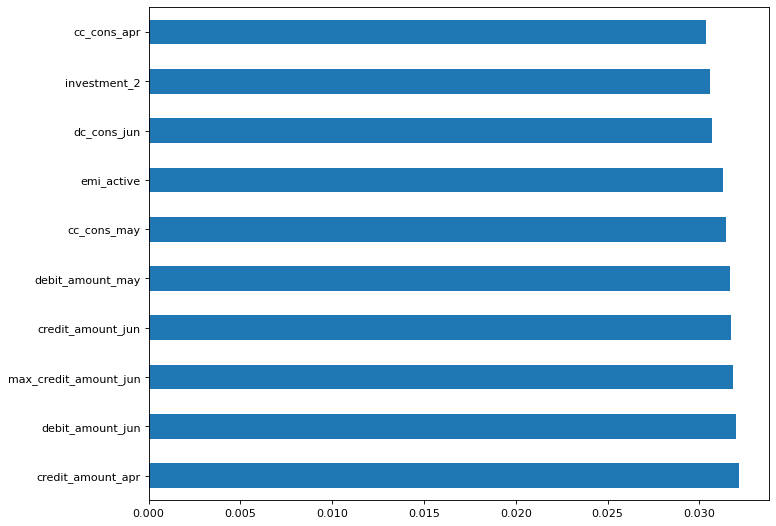

In [29]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

plt.figure(num = None, figsize = (10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= x.columns)

feat_importances.nlargest(10).plot(kind='barh')

Top 10 Features:
['credit_amount_apr', 'debit_amount_jun', 'max_credit_amount_jun', 'credit_amount_jun', 'debit_amount_may', 'cc_cons_may', 'emi_active', 'dc_cons_jun', 'investment_2', 'cc_cons_apr']


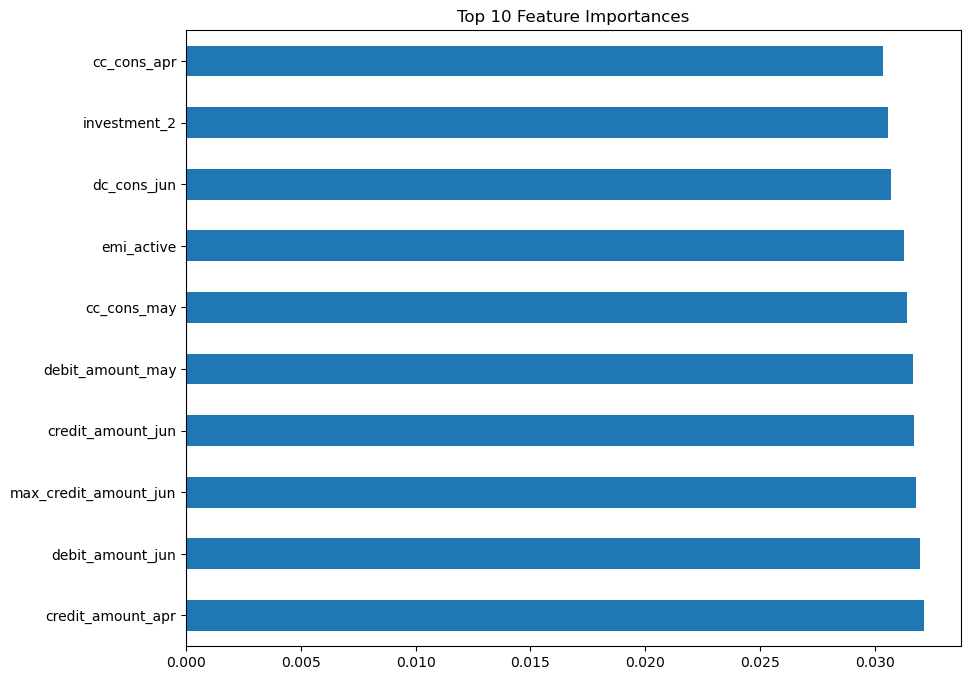

In [30]:
# Get the top 10 features
top_10_features = feat_importances.nlargest(10)

# Print the names of the top 10 features
print("Top 10 Features:")
print(top_10_features.index.tolist())

# Plot the top 10 features
plt.figure(figsize=(10, 8))
top_10_features.plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

In [31]:
# x_train = x_train[['cc_cons_may', 'dc_cons_may', 'dc_cons_jun', 'credit_count_apr',
#        'account_type', 'gender', 'Income', 'Tenure_with_Bank', 'region_code',
#        'NetBanking_Flag']]

# x_test = x_test[['cc_cons_may', 'dc_cons_may', 'dc_cons_jun', 'credit_count_apr',
#        'account_type', 'gender', 'Income', 'Tenure_with_Bank', 'region_code',
#        'NetBanking_Flag']]

In [32]:
# print(x_train.shape)
# print(x_test.shape)

In [33]:
# x_train = x_train[['cc_cons_may', 'cc_cons_jun', 'cc_cons_apr', 'emi_active', 'credit_amount_jun', 'dc_cons_jun', 'credit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'debit_amount_apr']]
# x_test = x_test[['cc_cons_may', 'cc_cons_jun', 'cc_cons_apr', 'emi_active', 'credit_amount_jun', 'dc_cons_jun', 'credit_amount_apr', 'debit_amount_jun', 'debit_amount_may', 'debit_amount_apr']]


In [34]:
from sklearn.ensemble import RandomForestRegressor

tree = RandomForestRegressor()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)


from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score
print("Mean Squared Error:", MSE(y_test, y_pred))
print("Mean Absolute Error:", MAE(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 0.02413709813598317
Mean Absolute Error: 0.10895426403635589
R-squared: -0.018610813867143472
